<a href="https://colab.research.google.com/github/JJJuliaa/Churn_Analysis/blob/main/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lime
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set()
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics,ensemble
from sklearn.metrics import f1_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
import lime
import lime.lime_tabular

In [ ]:
from google.colab import files
uploaded = files. upload()

Saving Telco.csv to Telco (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Telco.csv']),index_col = 0)

## Preliminary Analysis 

In [ ]:
#Inpected values in volumns and info 
for col in df.columns:
    print(col, "\n")
    print(df[col].unique(), "\n")
df.info()

gender 

['Female' 'Male'] 

SeniorCitizen 

[0 1] 

Partner 

['Yes' 'No'] 

Dependents 

['No' 'Yes'] 

tenure 

[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] 

PhoneService 

['No' 'Yes'] 

MultipleLines 

['No phone service' 'No' 'Yes'] 

InternetService 

['DSL' 'Fiber optic' 'No'] 

OnlineSecurity 

['No' 'Yes' 'No internet service'] 

OnlineBackup 

['Yes' 'No' 'No internet service'] 

DeviceProtection 

['No' 'Yes' 'No internet service'] 

TechSupport 

['No' 'Yes' 'No internet service'] 

StreamingTV 

['No' 'Yes' 'No internet service'] 

StreamingMovies 

['No' 'Yes' 'No internet service'] 

Contract 

['Month-to-month' 'One year' 'Two year'] 

PaperlessBilling 

['Yes' 'No'] 

PaymentMethod 

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] 

MonthlyCharges 


In [ ]:
#converted datatypes and unified the format of the names of columns 
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')
df = df.rename(columns={'customerID': 'CustomerID','gender':'Gender','tenure':'Tenure'})
print(df.columns.values)

['Gender' 'SeniorCitizen' 'Partner' 'Dependents' 'Tenure' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod' 'MonthlyCharges'
 'TotalCharges' 'Churn']


In [ ]:
#Inspected missing values 
print(df.isnull().sum())
df[df['TotalCharges'].isnull()]

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Gender  SeniorCitizen Partner  ... MonthlyCharges  TotalCharges Churn
customerID                                 ...                                   
4472-LVYGI  Female              0     Yes  ...          52.55           NaN    No
3115-CZMZD    Male              0      No  ...          20.25           NaN    No
5709-LVOEQ  Female              0     Yes  ...          80.85           NaN    No
4367-NUYAO    Male              0     Yes  ...          25.75           NaN    No
1371-DWPAZ  Female              0     Yes  ...          56.05           NaN    No
7644-OMVMY    Male              0     Yes  ...          19.85           NaN    No
3213-VVOLG    Male              0     Yes  ...          25.35           NaN    No
2520-SGTTA  Female              0     Yes  ...          20.00           NaN    No
2923-ARZLG    Male              0     Yes  ...          19.70           NaN    No
4075-WKNIU  Female              0     Yes  ...          73.35           NaN    No
2775-SEFEE    Male              0      No  ...          61.90           NaN    No

[11 rows x 20 columns]

In [ ]:
#set the missing values equal to the values in 'Monthly Charges'
missing = df[df['TotalCharges'].isnull()].index.tolist()
df.loc[missing,'TotalCharges'] = df.loc[missing,'MonthlyCharges']

In [ ]:
df.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Exploratory Data Analysis


In [ ]:
#Distribution of the target variable using plotly 
trace = go.Pie(labels = ['Churn : no', 'Churn : yes'], values = df['Churn'].value_counts(), 
               textfont=dict(size=30), opacity = 0.8,
               marker=dict( colors=['darkblue','darkorange'],
                           line=dict(color='#000000', width=0.5)))
layout = dict(title =  'Distribution of target variable', autosize=False, height = 300, width = 500)

fig = dict(data = [trace], layout=layout)
py.iplot(fig)

In [ ]:
#Explored the distributions of categorical columns 
col_list = list(df.columns)
col_list.remove('Tenure')
col_list.remove('MonthlyCharges')
col_list.remove('TotalCharges')
col_list.remove('Churn')
col_list

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [ ]:
col_list_array = np.array(col_list)
col_list_array = np.reshape(col_list_array, (4,4))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

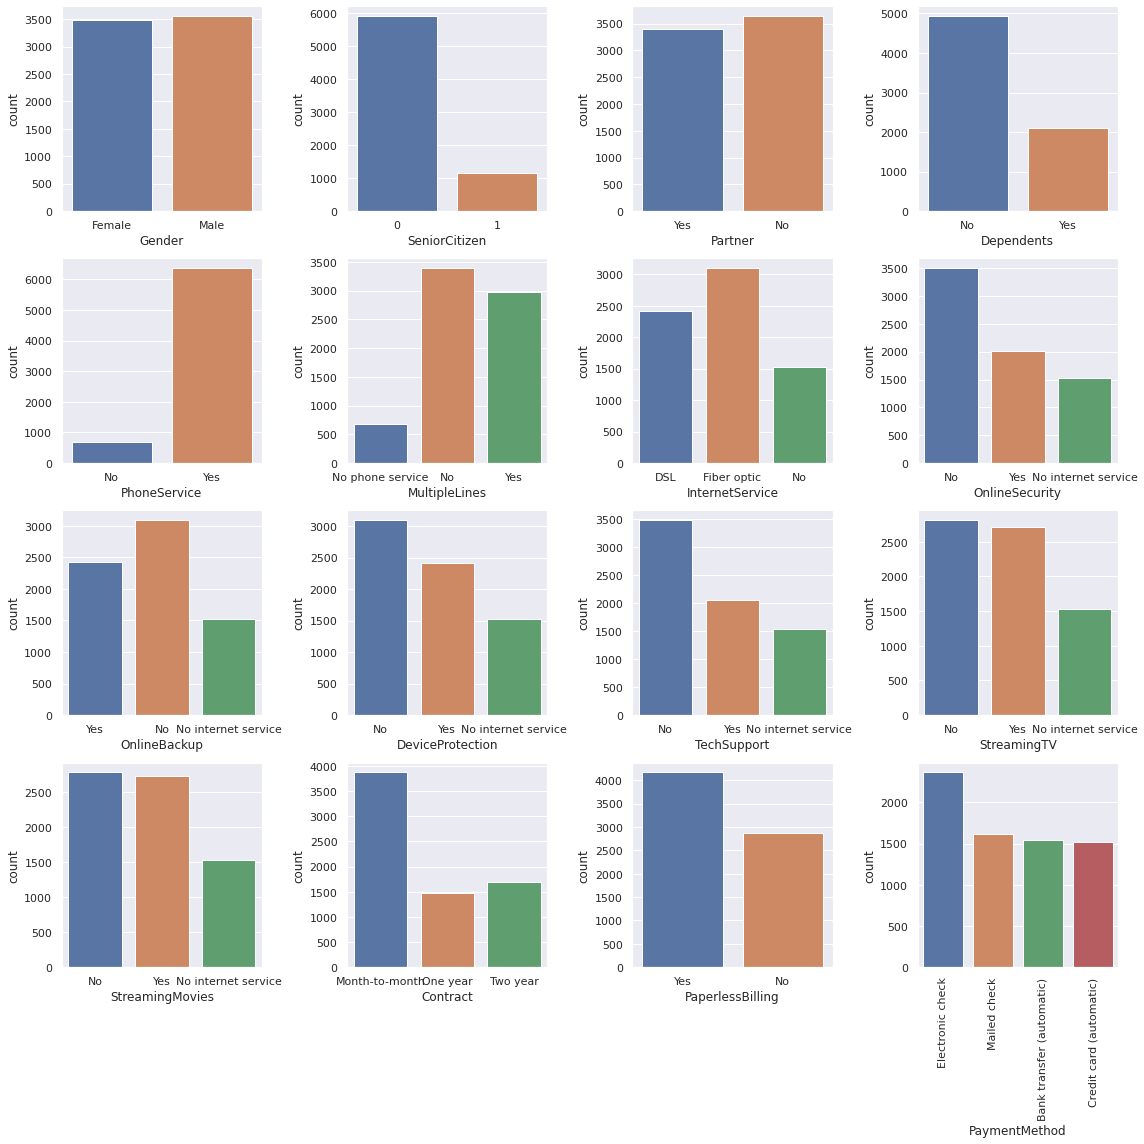

In [ ]:
nrows = 4 ; ncols = 4
fig, axes = plt.subplots(nrows, ncols, figsize=(16,16))
for row in range(nrows):
  for col in range(ncols):
    sns.countplot(df[col_list_array[row][col]],ax=axes[row,col])
    plt.xticks(rotation=90)
    plt.tight_layout()

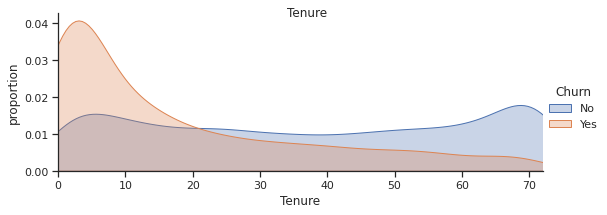

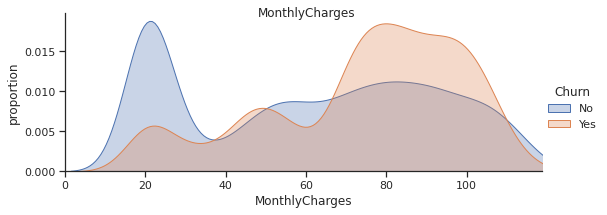

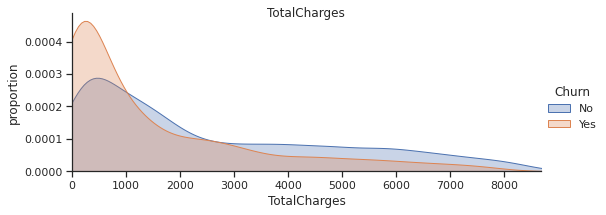

In [ ]:
#Explore the distribution of numeric variables 
def plot_distribution_num(data_select) : 
    sns.set_style("ticks")
    s = sns.FacetGrid(df, hue = 'Churn',aspect = 2.5)
    s.map(sns.kdeplot, data_select, shade = True, alpha = 0.3)
    s.set(xlim=(0, df[data_select].max()))
    s.add_legend()
    s.set_axis_labels(data_select, 'proportion')
    s.fig.suptitle(data_select)
    plt.show()
    
plot_distribution_num('Tenure')
plot_distribution_num('MonthlyCharges')
plot_distribution_num('TotalCharges')

In [ ]:
#K-MEANS Clustering (tenure, monthly charge)
mchg_and_tenure = df[['MonthlyCharges','Tenure']][df.Churn == 'Yes']

scaler = StandardScaler()
mchg_and_tenure_standardized = pd.DataFrame( scaler.fit_transform(mchg_and_tenure) )
mchg_and_tenure_standardized.columns = ['MonthlyCharges','Tenure']

list = []
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init = 'k-means++',random_state= 42)
  kmeans.fit((mchg_and_tenure_standardized))
  list.append(kmeans.inertia_)


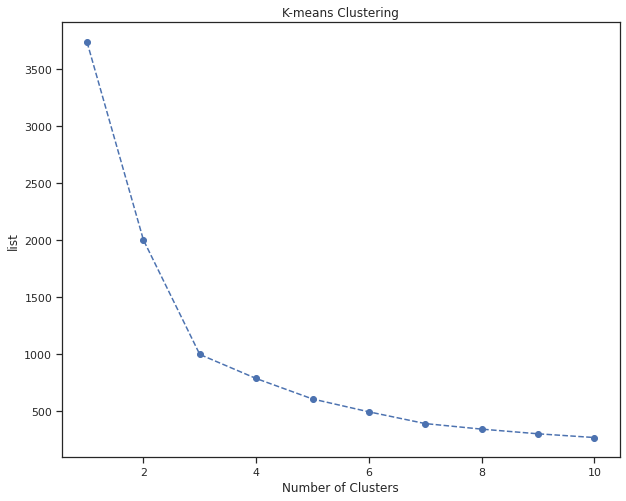

In [ ]:
#using the elbow method to determine the number of clusters 
plt.figure(figsize=(10,8))
plt.plot(range(1,11),list,marker = 'o',linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('list')
plt.title('K-means Clustering')
plt.show()

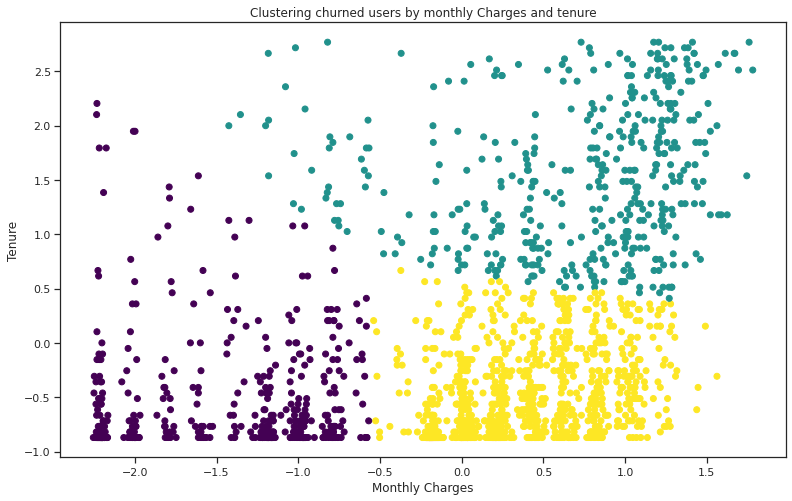

In [ ]:
#kmeans clustering 
mchg_and_tenure = df[['MonthlyCharges','Tenure']][df.Churn == 'Yes']

scaler = StandardScaler()
mchg_and_tenure_standardized = pd.DataFrame( scaler.fit_transform(mchg_and_tenure) )
mchg_and_tenure_standardized.columns = ['MonthlyCharges','Tenure']

kmeans = KMeans(n_clusters = 3, random_state = 42).fit(mchg_and_tenure_standardized)

mchg_and_tenure_standardized['cluster'] = kmeans.labels_

fig, ax = plt.subplots(figsize=(13,8))
plt.scatter( mchg_and_tenure_standardized['MonthlyCharges'], mchg_and_tenure_standardized['Tenure'],
           c = mchg_and_tenure_standardized['cluster'], cmap = 'viridis')

plt.title('Clustering churned users by monthly Charges and tenure')
plt.xlabel('Monthly Charges')
plt.ylabel('Tenure')


plt.show()

## Data Modeling

In [ ]:
#get dummies (manually)
cat_columns = ['Gender','Partner', 'Dependents', 'PhoneService',
               'MultipleLines','InternetService','OnlineSecurity',
               'OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies',
               'Contract','PaperlessBilling','PaymentMethod','Churn']

cat_to_num = {'No':0,'Yes':1, 
              'No phone service':3,
              'No internet service': 3,
              'Female':0, 'Male':1, 
              'Month-to-month':0, 'One year':1, 'Two year': 2,
              'DSL':1, 'Fiber optic':2,
              'Electronic check':0, 'Mailed check':1, 
              'Bank transfer (automatic)':2,'Credit card (automatic)':3}

df2 = df.copy()
for i in cat_columns:
    df2[i] = df[i].map(cat_to_num)

Machine Learning

In [ ]:
df2[['Tenure','MonthlyCharges','TotalCharges']] = StandardScaler().fit_transform(df[['Tenure','MonthlyCharges','TotalCharges']])

In [ ]:
df2.head()

Gender  SeniorCitizen  Partner  ...  MonthlyCharges  TotalCharges  Churn
customerID                                  ...                                     
7590-VHVEG       0              0        1  ...       -1.160323     -0.992667      0
5575-GNVDE       1              0        0  ...       -0.259629     -0.172198      0
3668-QPYBK       1              0        0  ...       -0.362660     -0.958122      1
7795-CFOCW       1              0        0  ...       -0.746535     -0.193706      0
9237-HQITU       0              0        0  ...        0.197365     -0.938930      1

[5 rows x 20 columns]

In [ ]:
#split the dataset 
x = df2.drop(['Churn'], axis = 1)
y = df2['Churn']
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y,random_state=42)

In [ ]:
#Hyper parameter tuning with gridsearchCV - LR 
clf_lr = GridSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'),{'C':[1,5,10]},cv=5,return_train_score=False)
clf_lr.fit(x_train,y_train)
print(clf_lr.best_params_)
print(clf_lr.best_score_)

{'C': 1}
0.8046156933574151


In [ ]:
#Evaluate model performance - LR
clf_lr = GridSearchCV(LogisticRegression(solver='liblinear',multi_class='auto'),{'C': [1]},cv=5,return_train_score=False)
clf_lr.fit(x_train,y_train)
y_pred_lr = clf_lr.predict(x_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_lr))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_lr)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_lr)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_lr)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_lr)))

Accuracy :0.80466
AUC : 0.72201
Precision : 0.65891
Recall : 0.54604
F1 : 0.59719


In [ ]:
#Hyper parameter tuning with gridsearchCV - RF
clf_rf = GridSearchCV(RandomForestClassifier(),{'n_estimators':[1,5,10]},cv=5,return_train_score= False)
clf_rf.fit(x_train,y_train)
print(clf_rf.best_params_)
print(clf_rf.best_score_)

{'n_estimators': 10}
0.77659434935925


In [ ]:
#Evaluate model performance - RF
clf_rf = GridSearchCV(RandomForestClassifier(),{'n_estimators': [10]},cv=5,return_train_score=False)
clf_rf.fit(x_train,y_train)
y_pred_rf = clf_rf.predict(x_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_rf))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_rf)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_rf)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_rf)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_rf)))

Accuracy :0.77115
AUC : 0.66021
Precision : 0.59639
Recall : 0.42398
F1 : 0.49562


In [ ]:
#Hyper parameter tuning with gridsearchCV - SVM
clf_svm = GridSearchCV(svm.SVC(gamma = 'auto'),{'C':[1,10,20],'kernel':['rbf','linear']},cv=5,return_train_score= False)
clf_svm.fit(x_train,y_train)
print(clf_svm.best_params_)
print(clf_svm.best_score_)

{'C': 10, 'kernel': 'rbf'}
0.8032890398784438


In [ ]:
#Evaluate model performance - SVM
clf_svm = GridSearchCV(svm.SVC(gamma = 'auto'),{'C':[1],'kernel':['rbf']},cv=5,return_train_score= False)
clf_svm.fit(x_train,y_train)
y_pred_svm = clf_svm.predict(x_test)
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred_svm))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred_svm)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred_svm)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred_svm)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred_svm)))

Accuracy :0.79784
AUC : 0.69138
Precision : 0.67183
Recall : 0.46467
F1 : 0.54937


In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train) ,feature_names = x_train.columns,mode='classification')

In [ ]:
exp = explainer.explain_instance(x_test.iloc[403], clf_lr.predict_proba)
exp.show_in_notebook(show_table = True)

In [ ]:
exp = explainer.explain_instance(x_test.iloc[75], clf_lr.predict_proba)
exp.show_in_notebook(show_table = True)